In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('4.jpg')

if image.shape[0] > 1080:
    scale = 1080 / image.shape[0]
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    dim = (width, height)
    image = cv2.resize(image, dim)

print(image.shape)

(599, 1062, 3)


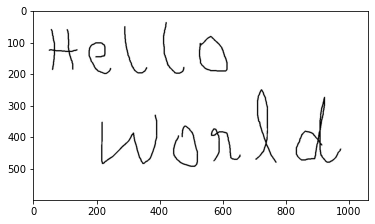

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray")
plt.show()

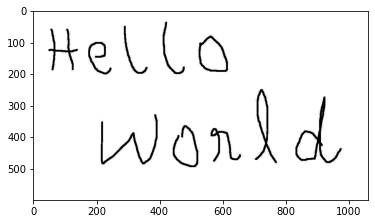

In [4]:
kernel = np.ones((3,3), np.uint8) 
gray = cv2.erode(gray, kernel, iterations = 1)
plt.imshow(gray, cmap = "gray")
plt.show()

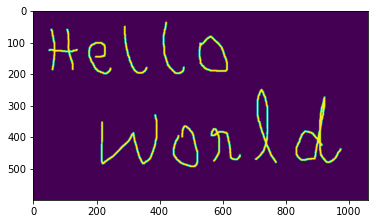

In [5]:
thresh = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh)
plt.show()

In [6]:
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
image_copy = image.copy()
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w+h > 70:
        cv2.rectangle(image_copy, (x-15, y-15), (x+w+15, y+h+15), (0,255,0), 2)
        ROI = thresh[y-15:y+h+15, x-15:x+w+15]
        cv2.imwrite('Segments/ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1
cv2.imshow('image', image_copy)
_ = cv2.waitKey()

In [ ]:
cv2.imwrite('res3.jpg', image_copy)